In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime
import os

# Functions
from implementations_cross_validation import *
from helpers import *
from preprocessing import *

# Autoreload
%load_ext autoreload
%autoreload 2


In [2]:
# Set random seed
np.random.seed(1)

(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")
(t_labels, t_data_raw, t_ids) = load_csv_data("data/test.csv")
# labels_raw_portion = labels_raw[:10000]
# data_raw_portion = data_raw[:10000,:]
# ids_raw_portion = ids_raw[:10000]
data_, data_t_, labels = process_data(data_raw, t_data_raw, labels_raw, ids_raw, replace = 'mean')


The original dimensions of the training data set was 250000 samples and 30 columns
 After feature and sample filtering, there are 223877 samples and 23 columns


In [3]:
# Create train/test split

X_train, y_train, X_test, y_test = split_data(data_, labels, ratio=0.8, seed=1)

# Create standardizations for the split

X_train_std, mean, variance = standardize(X_train)
X_test_std = standardize_test(X_test, mean, variance)

# Initialize boxplots values

boxplots = []
test_accuracies = []

# Linear Regression: Gradient Descent

In [4]:
# Initialize w vector
initial_w = np.random.rand(data_.shape[1])
k_ = 4

# Perform linear regression by gradient descent with cross validation (k=4)
test_loss_mean, test_loss_var, vector_test_loss, train_loss_mean, w_final, accuracies = least_squares_GD(y_train, X_train, initial_w, gamma = 0.00005, k=k_, max_iters = 5000)
boxplots.append(accuracies)

# Perform linear regression by gradient descent on whole training set
w = least_squares_GD(y_train, X_train_std, initial_w, gamma = 0.00005, k=0, max_iters = 5000)

# Use w to predict unseen test set labels
test_pred_lab = predict_labels(w, X_test_std)
test_accuracy = pred_accuracy(test_pred_lab, y_test)
test_accuracies.append(test_accuracy)

In [5]:
# Write results to file

file_object = open('cv_results', 'w')
file_object.write('fold1, fold2, fold3, fold4, test_set \n')
acc_s = str(accuracies[0]) + ', ' + str(accuracies[1]) + ', ' + str(accuracies[2]) + ', ' + str(accuracies[3])
acc_t = str(test_accuracy) + '\n'
file_object.write(acc_s + ', ' + acc_t)


98

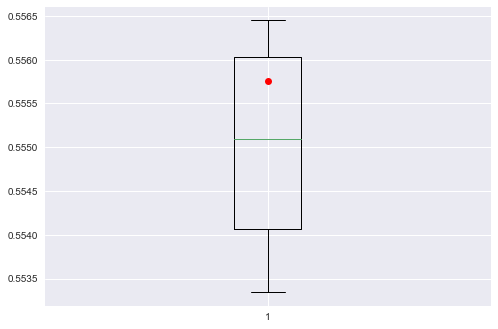

In [6]:
plt.style.use('seaborn')
plt.boxplot(accuracies)
plt.plot(1, test_accuracy, marker='o', c='red')

# Linear Regression: Stochastic Gradient Descent

In [7]:
# Initialize w vector
initial_w = np.random.rand(data_.shape[1])
k_ = 4
batch_size = 500 # default batch size in SGD function
max_iter_batch = int(X_train.shape[0] / batch_size) - 1 # how many iterations one should do

# Perform algorithm with cross validation (k=4)
w_final, accuracies = least_squares_SGD(y_train, X_train, initial_w, batch_size = batch_size, gamma = 0.00005, k=k_, max_iters=max_iter_batch)
boxplots.append(accuracies)

# Perform algorithm on whole training set
w = least_squares_SGD(y_train, X_train, initial_w, gamma = 0.00005, k=0, max_iters=max_iter_batch)

# Use w to predict unseen test set labels
test_pred_lab = predict_labels(w, X_test_std)
test_accuracy = pred_accuracy(test_pred_lab, y_test)
test_accuracies.append(test_accuracy)

In [8]:
# Write results to file

acc_s = str(accuracies[0]) + ', ' + str(accuracies[1]) + ', ' + str(accuracies[2]) + ', ' + str(accuracies[3])
acc_t = str(test_accuracy) + '\n'
file_object.write(acc_s + ', ' + acc_t)

98

# Linear Regression: Direct Least Squares

In [9]:
k_ = 4

# Perform linear regression by direct least squares with cross validation (k=4)
test_loss_mean, test_loss_var, train_loss_mean, w_final, accuracies = least_squares(y_train, X_train, k_)
boxplots.append(accuracies)

# Perform linear regression by direct least squares on whole training set
w = least_squares(y_train, X_train_std, k=0)

# Use w to predict unseen test set labels
test_pred_lab = predict_labels(w, X_test_std)
test_accuracy = pred_accuracy(test_pred_lab, y_test)
test_accuracies.append(test_accuracy)

In [10]:
# Write results to file

acc_s = str(accuracies[0]) + ', ' + str(accuracies[1]) + ', ' + str(accuracies[2]) + ', ' + str(accuracies[3])
acc_t = str(test_accuracy) + '\n'
file_object.write(acc_s + ', ' + acc_t)


99

# Linear Regression: Regularized

In [30]:
# Search for optimal lambda value to implement for cross validation

lambdas = np.logspace(-7, 0, 30)
rmse_tr = []
rmse_ts = []
pred_tr = []
pred_ts = []

for ind, lambda_ in enumerate(lambdas):
    
    w = ridge_regression(y_train, X_train, lambda_, k=0)
    
#     rmse_tr.append(np.sqrt(2 * compute_loss(y_train, X_train, w)))
    pred_tr.append(pred_accuracy(predict_labels(w, X_train), y_train))
#     rmse_ts.append(np.sqrt(2 * compute_loss(y_test, X_test, w)))
    pred_ts.append(pred_accuracy(predict_labels(w, X_test), y_test))
    
selected_lambda = lambdas[np.argmax(pred_ts)]

In [32]:
k_ = 4

# Perform regularized linear regression with cross validation (k=4)
# Note that the value for lambda that is selected for this cross validation assessment it taken 
# from the above grid search which provided the best accuracies scores for the test set.

w_final, accuracies = ridge_regression(y_train, X_train, lambda_=selected_lambda, k=k_)
boxplots.append(accuracies)

# Perform regularized linear regression on whole training set
w = ridge_regression(y_train, X_train_std, lambda_=selected_lambda, k=0)

# Use w to predict unseen test set labels
test_pred_lab = predict_labels(w, X_test_std)
test_accuracy = pred_accuracy(test_pred_lab, y_test)
test_accuracies.append(test_accuracy)

In [33]:
# Write results to file

acc_s = str(accuracies[0]) + ', ' + str(accuracies[1]) + ', ' + str(accuracies[2]) + ', ' + str(accuracies[3])
acc_t = str(test_accuracy) + '\n'
file_object.write(acc_s + ', ' + acc_t)
file_object.close()

# Logistic Regression

In [ ]:
# Initialize parameters
initial_w = np.random.rand(data_.shape[1])
k_ = 4
thresh = 0.5

# Perform logistic regression with Newton's Method

w_final, accuracies = logistic_hessian(y_train, X_train, initial_w = initial_w, k=k_, lam=0.1)
boxplots.append(accuracies)

# Perform algorithm on entire training set to retrieve w
w = logistic_hessian(y_train, X_train_std, initial_w=initial_w,lam=0.1, k=0)

# Use w to predict unseen test set labels
test_pred_lab = predict_labels_logistic(w, X_test_std, threshold=thresh)
test_accuracy = pred_accuracy(test_pred_lab, y_test)
test_accuracies.append(test_accuracy)

In [ ]:
print(test_accuracy)

In [ ]:
# Write results to file

acc_s = str(accuracies[0]) + ', ' + str(accuracies[1]) + ', ' + str(accuracies[2]) + ', ' + str(accuracies[3])
acc_t = str(test_accuracy) + '\n'
file_object.write(acc_s + ', ' + acc_t)
file_object.close()

# Create Boxplots

[0.5557565605806812, 0.5716582914572864, 0.6879731993299832, 0.6879061976549413]


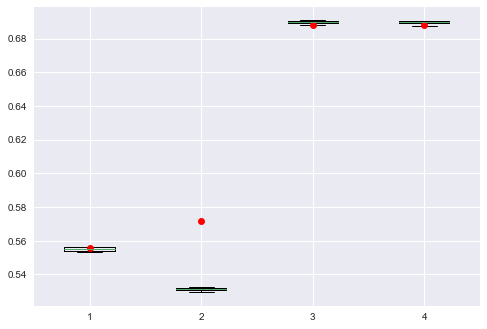

In [35]:
# Create boxplots

plt.style.use('seaborn')
plt.boxplot(boxplots)
plt.plot(1, test_accuracies[0], marker='o', c='red')
plt.plot(2, test_accuracies[1], marker='o', c='red')
plt.plot(3, test_accuracies[2], marker='o', c='red')
plt.plot(4, test_accuracies[3], marker='o', c='red')
print(test_accuracies)

In [ ]:
# #make a plot of the four k's to see how they vary over time

# means_over_time = vector_test_loss.mean(axis=0)
# error1 = abs(means_over_time - vector_test_loss[0])
# error2 = abs(means_over_time - vector_test_loss[1])
# error3 = abs(means_over_time- vector_test_loss[2])
# error4 = abs(means_over_time - vector_test_loss[3])
# x = np.arange(len(error1))


# plt.style.use('seaborn')
# # for i in np.arange(4):
# #     plt.plot(x, vector_test_loss[i], label= 'Trial {}'.format(i))
# plt.plot(x, vector_test_loss[0], label='Trial 1', c='red')
# plt.fill_between(x, vector_test_loss[0]-error1, vector_test_loss[0]+error1,
#     alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848')
# plt.plot(x, vector_test_loss[1], label='Trial 2', c = 'green')
# plt.fill_between(x, vector_test_loss[1] - error2, vector_test_loss[1] + error2, alpha = 0.2, edgecolor='#FF3F1B', facecolor = '#12E99F')
# plt.plot(x, vector_test_loss[2], label='Trial 3', c='blue')
# plt.fill_between(x, vector_test_loss[2]-error3, vector_test_loss[2]+error3,
#     alpha=0.2, edgecolor='#CC4F1B', facecolor='#12E2FF')
# plt.plot(x, vector_test_loss[3], label='Trial 4', c='purple')
# plt.fill_between(x, vector_test_loss[3]-error4, vector_test_loss[3]+error4,
#     alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF00FF')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Test Set Loss Over Iterations of Gradient Descent')
# plt.legend()
# plt.show()